# UWB Gesture Detection

## Cloning the GitHub repo to get the datset

In [ ]:
!git clone https://github.com/Apoorv-17/UWB.git

Cloning into 'UWB'...
remote: Enumerating objects: 13440, done.
remote: Counting objects: 100% (13440/13440), done.
remote: Compressing objects: 100% (12383/12383), done.
remote: Total 13440 (delta 1054), reused 13437 (delta 1054), pack-reused 0
Receiving objects: 100% (13440/13440), 32.42 MiB | 15.02 MiB/s, done.
Resolving deltas: 100% (1054/1054), done.
Checking out files: 100% (13505/13505), done.


## Importing necessary libraries


In [ ]:
import os
import sys
import random
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix

import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator, array_to_img
from tensorflow.keras.applications import EfficientNetB1

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Conv2D,Dropout,GlobalAveragePooling2D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import imutils    

In [ ]:
import xgboost as xgb

## Navigation folders


In [ ]:
filePath = '/content/UWB/Dataset/modifiedData/'
dataList = os.listdir('/content/UWB/Dataset/modifiedData/')

## Initialize labels array


In [ ]:
y = np.zeros(len(dataList))
X = np.empty((1,990), float)

In [ ]:
def prepare_dataset(X, labels):
    try:
        i = 0
        # Prepare dataset
        for filename in dataList:
            if 'rect' in filename:
                y[i] = 1
            data = np.genfromtxt(filePath + filename, delimiter=',').flatten()
            data = np.reshape(data, (-1,990))
            X = np.concatenate((X, data), axis=0)

            i += 1
    except:
        print(filename)

    # Clear first row
    X = np.delete(X, 0, axis=0)

    return X, y

In [ ]:
X, y = prepare_dataset(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

## Random Forest Classifier

In [ ]:
def randomForestCalc(X_train, X_test, y_train, y_test):
    print('-------------------------------------------')
    print('------------- Random Forest ---------------')

    # Random Forest Algorithm
    clf = RandomForestClassifier(n_estimators=80)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    rf_acc = metrics.accuracy_score(y_test, y_pred)
    # acc_list.append(rf_acc)
    # if rf_acc > max_acc:
    #     max_acc = rf_acc
    #     max_est = n_est
    rf_prec = metrics.precision_score(y_test, y_pred)
    rf_rec = metrics.recall_score(y_test, y_pred)
    print('Accuracy: ', rf_acc)
    print('Precision: ', rf_prec)
    print('Recall: ', rf_rec)
    Fscore = 2 * rf_rec * rf_prec / (rf_rec + rf_prec)
    print('F-score: ', Fscore)    
    sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt='0.0f')
    plt.show()
    print('-------------------------------------------')

## XGBoost Classifier

In [ ]:
def XGBoostCalc(X_train, X_test, y_train, y_test):
    print('-------------------------------------------')
    print('--------------- XGBoost -------------------')

    # XGBoost Algorithm
    D_train = xgb.DMatrix(X_train, label=y_train)
    D_test = xgb.DMatrix(X_test, label=y_test)
    param = {
        'eta': 0.2,
        'max_depth': 3,
        'objective': 'multi:softprob',
        'num_class': 2}
    steps = 100
    model = xgb.train(param, D_train, steps)
    preds = model.predict(D_test)
    best_preds = np.asarray([np.argmax(line) for line in preds])
    xgb_acc = accuracy_score(y_test, best_preds)
    xgb_prec = precision_score(y_test, best_preds, average='macro')
    xgb_rec = recall_score(y_test, best_preds, average='macro')
    print('Accuracy = {}'.format(xgb_acc))
    print('Precision = {}'.format(xgb_prec))
    print('Recall = {}'.format(xgb_rec))
    Fscore = 2 * xgb_rec * xgb_prec / (xgb_rec + xgb_prec)
    print('F-score: ', Fscore)
    sns.heatmap(confusion_matrix(y_test, best_preds), annot = True, fmt='0.0f')
    plt.show()
    print('-------------------------------------------')

-------------------------------------------
------------- Random Forest ---------------
Accuracy:  0.8757396449704142
Precision:  0.8412698412698413
Recall:  0.828125
F-score:  0.8346456692913385


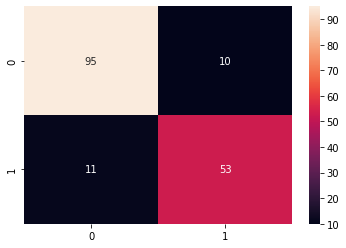

-------------------------------------------
-------------------------------------------
--------------- XGBoost -------------------
Accuracy = 0.8165680473372781
Precision = 0.8225340136054422
Recall = 0.7822172619047619
F-score:  0.8018691915249293


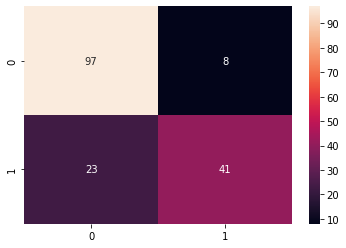

-------------------------------------------


In [ ]:
randomForestCalc(X_train, X_test, y_train, y_test)
XGBoostCalc(X_train, X_test, y_train, y_test)

# Neural Network
 

In [ ]:
import numpy as np
import pandas as pd
import os
import sys
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

from keras import Sequential
from keras.layers import InputLayer, Dense, ReLU, Flatten, Dropout
from keras.layers import BatchNormalization
from keras.regularizers import l1, l2
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# Method to prepare the dataset
def prepare_dataset(X, labels):
    i = 0
    # Prepare dataset
    for filename in dataList:
        if 'rect' in filename:
            y[i] = 1
        data = np.genfromtxt(filePath + filename, delimiter=',').flatten()
        data = np.reshape(data, (-1,990))
        X = np.concatenate((X, data), axis=0)
        i += 1
    # Clear first row
    X = np.delete(X, 0, axis=0)

    return X, y

In [ ]:
filePath = '/content/UWB/Dataset/modifiedData/'
dataList = os.listdir('/content/UWB/Dataset/modifiedData/')

In [ ]:
# Initialize labels array
y = np.zeros(len(dataList))
X = np.empty((1,990), float)

In [ ]:
# Call the method to adjust the dataset and split it into train/test parts
X, y = prepare_dataset(X, y)

In [ ]:
# Initialize number of estimations for fold, cross_validation score list and
# confusion matrix init
n_est = 5
crs_val_fold = []
iter = 0
conf_arr = []
history_rec = []

In [ ]:
# Prepare the splitting based on number of estimations for StratifiedKFold
for train_ind, test_ind in StratifiedKFold(n_est, shuffle=True).split(X, y):
    X_train, X_test = X[train_ind], X[test_ind]
    y_train, y_test = y[train_ind], y[test_ind]

    # Setup and train the model
    model = Sequential([
        InputLayer((990,)),
        Dense(64),
        Dropout(0.5),
        ReLU(),
        Dense(32),
        Dropout(0.5),
        ReLU(),
        Dense(1, activation='sigmoid')
    ])

    model.summary()

    model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['acc'])

    weight_name = 'weights' + str(iter) + '.h5'

    # Train the model
    # Two callbackes added for weight saving and stopping training
    # if the accuraccy is not improveed over 30 iterations
    save_best = ModelCheckpoint(filepath='nnData/' + weight_name,
                                verbose=0, save_best_only=True)
    early_stopping = EarlyStopping(patience=30)
    history = model.fit(X_train, y_train,
              epochs=400,
              validation_data=(X_test, y_test),
              callbacks=[save_best, early_stopping])

    # Append model results for further processing
    history_rec.append(history)

    # Evaluate the test set for fold
    scores = model.evaluate(X_test, y_test)

    # Plot the confusion matrix and score for each fold
    iter += 1
    print("%s: %.2f%%" % ('Accuracy: ', scores[1]*100))
    crs_val_fold.append(scores[1] * 100)
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_arr.append(conf_matrix)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                63424     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 re_lu_4 (ReLU)              (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 re_lu_5 (ReLU)              (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                

In [ ]:
# Show the results after folds
print()
print("Total Cross Validation Acc: %.2f%% (+/- %.2f%%)"
                                % (np.mean(crs_val_fold), np.std(crs_val_fold)))


Total Cross Validation Acc: 94.54% (+/- 1.28%)


In [ ]:
# Plot the confusion matrix for all folds (total conf_mat is sum of each folds)
print('Confusion matrix: ')
total_conf = np.zeros((2,2))
for mat in conf_arr:
    total_conf += np.array(mat)
print(total_conf)

Confusion matrix: 
[[324.  11.]
 [ 20. 206.]]


In [ ]:
# Compare the each fold model results and plot the best one
# Basic method of max extraction
best_acc = history_rec[0]
for elem in history_rec:
    if np.mean(elem.history['acc']) > np.mean(best_acc.history['acc']):
        best_acc = elem

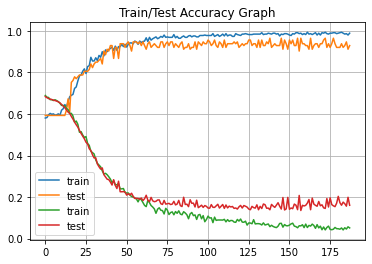

In [ ]:
# Plot the train and test accuraccy score
plt.plot(best_acc.history['acc'], label='train')
plt.plot(best_acc.history['val_acc'], label='test')
plt.plot(best_acc.history['loss'], label='train')
plt.plot(best_acc.history['val_loss'], label='test')
plt.title('Train/Test Accuracy Graph')
plt.legend()
plt.grid(True)
plt.show()